# Unsupervised Exercise 1

## Implement k-Means clustering

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Preparation: Generate data to use for testing k-means clustering

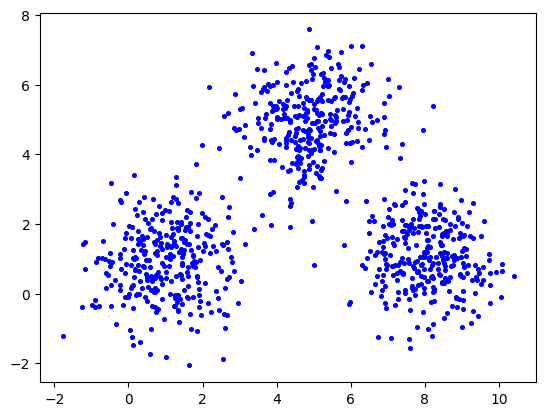

In [2]:
# generate random data
gt_1 = np.array([1,1])
gt_2 = np.array([5,5])
gt_3 = np.array([8,1])
data_1 = np.random.randn(300,2) + gt_1
data_2 = np.random.randn(300,2) + gt_2
data_3 = np.random.randn(300,2) + gt_3
data = np.concatenate((data_1, data_2, data_3),axis = 0)
plt.scatter(data[:,0], data[:,1], s=7,c='b')

### Question 1: Implement function `k_means` below to perform K Means clustering without using `sklearn`:

In [3]:
def k_means(data, k, centers):
    """
    Perform clustering using K-means algorithm
    :param data: observations
    :param k: number of clusters to cluster into
    :param centers: initial cluster centers
    :return: tuple of:
       1. Final cluster centers
       2. Assignments - np.array with cluster number each observation is assigned to
       3. WCSS value
    """
    # your code here
    prev = np.zeros(data.shape[0],dtype = int) - 1
    while True:
      dist = np.linalg.norm(data - centers[:,np.newaxis], axis = -1)
      assignments = np.argmin(dist,axis = 0)
      if np.array_equal(assignments,prev):
        break
      new_centers = np.array([data[assignments == i].mean(axis = 0) if np.any(assignments ==i) else centers[i] for i in range(k)])
      centers = new_centers
      prev = assignments
    wcss = np.sum((data - centers[assignments])**2)

    return centers,assignments,wcss




**Checking that your model works**:
You can use Question 2a code below to test your code

### Additional instructions:
When implemeting the function, please make sure to:

**1. Pay attention to your model's run time.**
If your implementation is inefficient, if it will be very slow and will not work on a large number of observations, your model might be useless for real large data in production code.  
Some signs of inefficient code:
1. Usage of loops (especially loops per number of observations, a number that might be extremely big).
2. Usage of a lot of data types and data structures conversions, expecially something that happens inside a loop.
3. Growing data structures - appending 1 by 1 to a growing array

Almost everything you can do with the above, you can do with Numpy arrays operations that work on the whole array at once.

**2. Don't use higher level functions**

Since this is an exercise where we would like to get our hands dirty and to feel what it's like to implement a model from scratch, use mostly built-in Numpy functions, don't use a higher level functions that do most of the work for us, like sklearn distance functions.

**3. Make sure your WCSS calculation is correct**

Consider comparing to `inertia_` parameter of real `sklearn.cluster.KMeans`

### Question 2: Test your k-means function with the generated data

In [4]:
def cluster_and_plot(data, k):
    # pick random centers to be initial cluster centers
    initial_centers = data[np.random.randint(data.shape[0],size=k)]

    # cluster with k-means
    centers, assign, wcss = k_means(data, k, initial_centers)

    print('New cluster centers:\n', centers)

    # plot the data-point and the new clusters
    plt.scatter(data[:,0], data[:,1], s=7, c=assign)
    plt.scatter(centers[:,0], centers[:,1], marker='^', c='r', s=80, label='Cluster centers');
    plt.legend()
    plt.title(f'Points clustered with k-means, k: {k}, colored by cluster, WCSS: {round(wcss, 2)}');

#### Questions:
- **2a.** Using `cluster_and_plot` function above and your `k-means` function, cluster into 3 clusters and plot the `data` that was generated earlier
- **2b.** Would you say that clustering is good?
- **2c.** Now cluster into 4 clusters
- **2d.** Compare the WCSS of clustering into 3 & 4 clusters.  What's your conclusion?
- **2e.** Plot different k values and their WCSS values.  How many clusters would you classify into and why?

New cluster centers:
 [[1.0069822  0.93056297]
 [4.89310465 4.96253588]
 [8.03934065 1.05649361]]


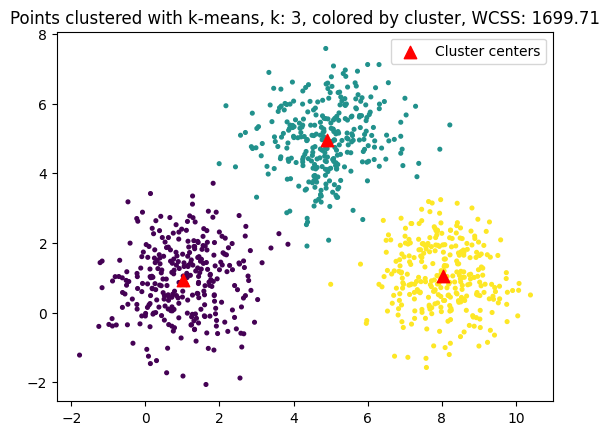

In [5]:
#2.a
cluster_and_plot(data,3)

2.b

CLustering looks good on the plot.  However, the WCSS is quite high for 3 clusters.

New cluster centers:
 [[0.97273778 0.90386893]
 [5.47369604 5.59635238]
 [4.27920635 4.2787513 ]
 [8.03934065 1.05649361]]


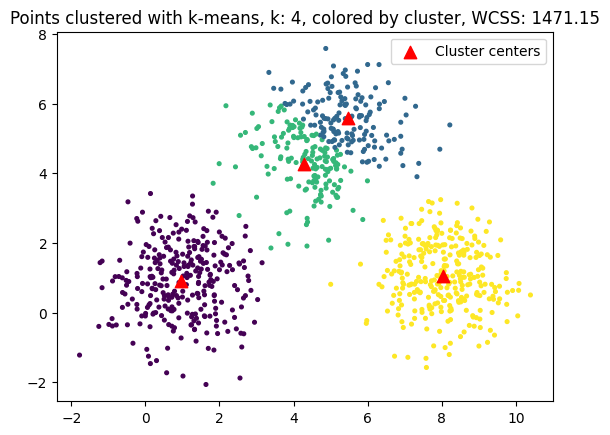

In [6]:
#2.c
cluster_and_plot(data,4)

2.d
We get a lower WCSS for 4 clusters (1581.15 vs 1785.91) so the more cluster we have, the lower WCSS will be.

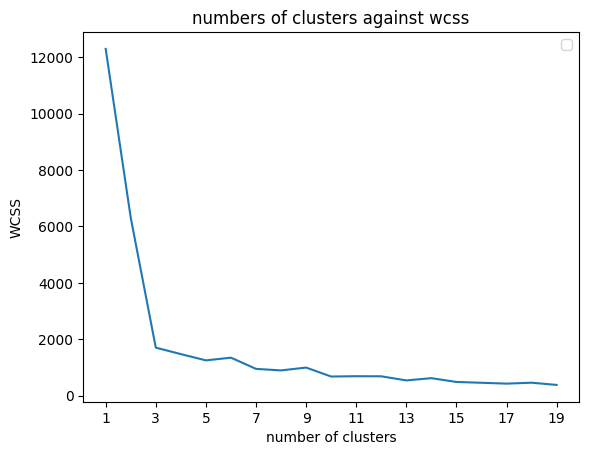

In [7]:
#2.e
list_wcss = [k_means(data,k,data[np.random.randint(data.shape[0],size=k)])[2] for k in range(1,20)]
nbr_clusters = np.arange(1,20,dtype = int)
plt.plot(nbr_clusters,list_wcss)
plt.xticks(np.arange(1,20,2))
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.legend()

plt.title('numbers of clusters against wcss')

plt.show()

I would classify data into 5 clusters as we have a low WCSS and enough clusters.
Classify data into more clusters would lower the wcss but it will be too sophisticated and unnecessary for the data we have.

### Question 3: Use your k-means function for image quantization

**Question 3a.** Run the following code to perform image quantization on an image `flower.jpg`.  

**Tip**: if the algorithm doesn't converge, or the image is not clear, check the data types of your Numpy arrays (which data type would you need for best precision?)

WCSS channel 0: 25603274
WCSS channel 1: 24342883
WCSS channel 2: 17647922


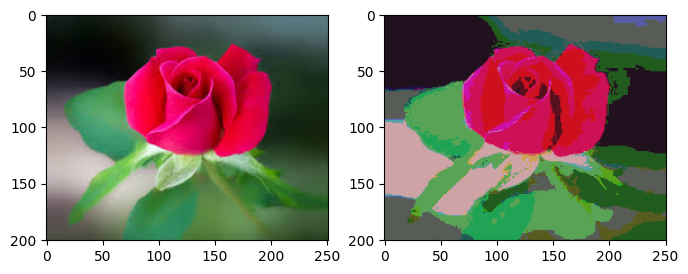

In [8]:
from PIL import Image
import scipy.misc

def apply_clustering(im):
    [width, height, color] = im.shape
    out = np.zeros_like(im)
    k = 3
    # apply clustering on each color channel
    for col_channel in range(color):
        # prepare
        channel_vals = im[:,:,col_channel].ravel()
        data = np.expand_dims(channel_vals,1)

        #prepare random centers and call K_means method
        centers = data[np.random.randint(data.shape[0], size=k)]
        centers, assign, wcss = k_means(data, k, centers)
        print(f'WCSS channel {col_channel}: {int(wcss)}')

        #transform the colors in the image accirding to the clustering
        for i in range(k):
            channel_vals[assign == i] = centers[i]
        gray = np.reshape(channel_vals, [width, height])
        out[:,:,col_channel] = gray
    return out

# read image and apply clustering
im1 = np.array(Image.open("flower.jpg"))
out1 = apply_clustering(im1)

# show input vs output
plt.figure(1,figsize=(8,16))
plt.subplot(1,2,1);
plt.imshow(im1);
plt.subplot(1,2,2);
plt.imshow(np.float32(out1)/255);

The image looks clear and the algorithm converge. We need integers on our arrays for best precision.

**Bonus Question 3b:** Approximately by what magnitute can the image size be reduced after clustering to the image?  Explain why.

After clustering to the image, we can reduce the size of it to more or less 150x125 as we can remove all the background and keep only the red part of the flower.